### Part 1 Analysis the Wolfe Primates

These data represent 3 months of interactions among a troop of monkeys, observed in the wild by Linda Wolfe as they sported by a river in Ocala, Florida. Joint presence at the river was coded as an interaction and these were summed within all pairs. 

There are two files for the data. `labels.csv` is the file contains information for each monkey, with their genders, ages and their rank in the troop. `link_m.csv` is the file contains the number of their interaction in the adjacency matrix format. 

#### Part 1.1 Visualize the adjacency matrix (5 points)

Load the data and re-arrange the link matrix with the rank. Then use the following code to get the data visualization for the adjacency matrix. 
    
    plt.imshow(link_m, cmap='binary', interpolation='none')

Give title and labels for the plot.     

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

link_m = pd.read_csv('link_m.csv', header=None)
labels = pd.read_csv('labels.csv')

# Rearrange according to rank
labels = labels.sort_values(by='Rank')
link_m = link_m.reindex(labels['Id']-1)

labels

,Id,Sex,Age,Rank
0,1,male,15,1
1,2,male,10,2
2,3,male,10,3
3,4,male,8,4
4,5,male,7,5
7,8,female,11,6
10,11,female,16,7
11,12,female,10,8
9,10,female,9,9
5,6,female,15,10


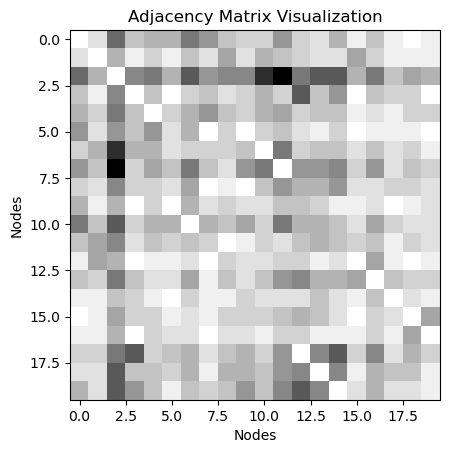

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

link_m = pd.read_csv('link_m.csv', header=None)
labels = pd.read_csv('labels.csv')

# Rearrange according to rank
labels = labels.sort_values(by='Rank')
link_m = link_m.reindex(labels['Id']-1)


plt.imshow(link_m, cmap='binary', interpolation='none')

plt.title('Adjacency Matrix Visualization')
plt.xlabel('Nodes')
plt.ylabel('Nodes')

plt.show()


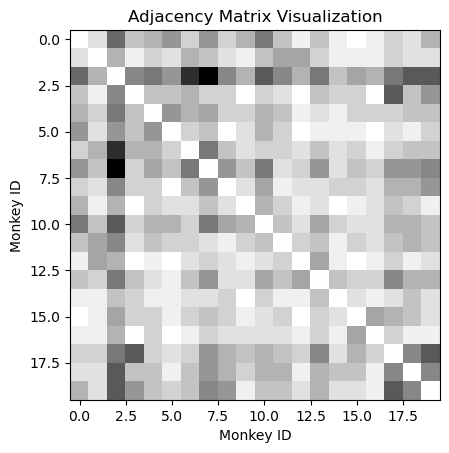

In [83]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

link_m = pd.read_csv('link_m.csv', header=None)
labels = pd.read_csv('labels.csv')

link_m.index = range(1, len(link_m)+1)
link_m.columns = range(1, len(link_m.columns)+1)

ranks = labels.set_index('Id')['Rank']
ranks.index.name = None

sorted_ids = ranks.sort_values().index
link_m = link_m.reindex(sorted_ids)
link_m = link_m.T.reindex(sorted_ids).T

plt.imshow(link_m, cmap='binary', interpolation='none')

plt.title('Adjacency Matrix Visualization')
plt.xlabel('Monkey ID')
plt.ylabel('Monkey ID')

plt.show()

#### Part 1.2 edgelist (5 points)

Convert the data into a edgelist data frame with three columns: source, target and weight. 

In [77]:
monkeys = len(link_m)

edge_list = []
weight_list = []

for i in range(monkeys):
    for j in range(i+1, monkeys):
        weight = link_m.iloc[i, j]
        if weight !=0:
            edge_list.append((i+1, j+1))
            weight_list.append(weight)

edgelist_df = pd.DataFrame({'source': [edge[0] for edge in edge_list],
                            'target': [edge[1] for edge in edge_list],
                            'weight': weight_list})

edgelist_df

,source,target,weight
0,1,2,2
1,1,3,10
2,1,4,4
3,1,5,5
4,1,6,7
...,...,...,...
176,17,19,1
177,17,20,1
178,18,19,8
179,18,20,11


#### Part 1.3 Make a static network (20 points)

Use the edgelist generated from part 1.2, make a bipartite network, such that one side is for male and the other side is for female. The colors of the nodes are decided by the gender. The sizes of the nodes are decided by the age. The width of the edges are decided by the weight. 

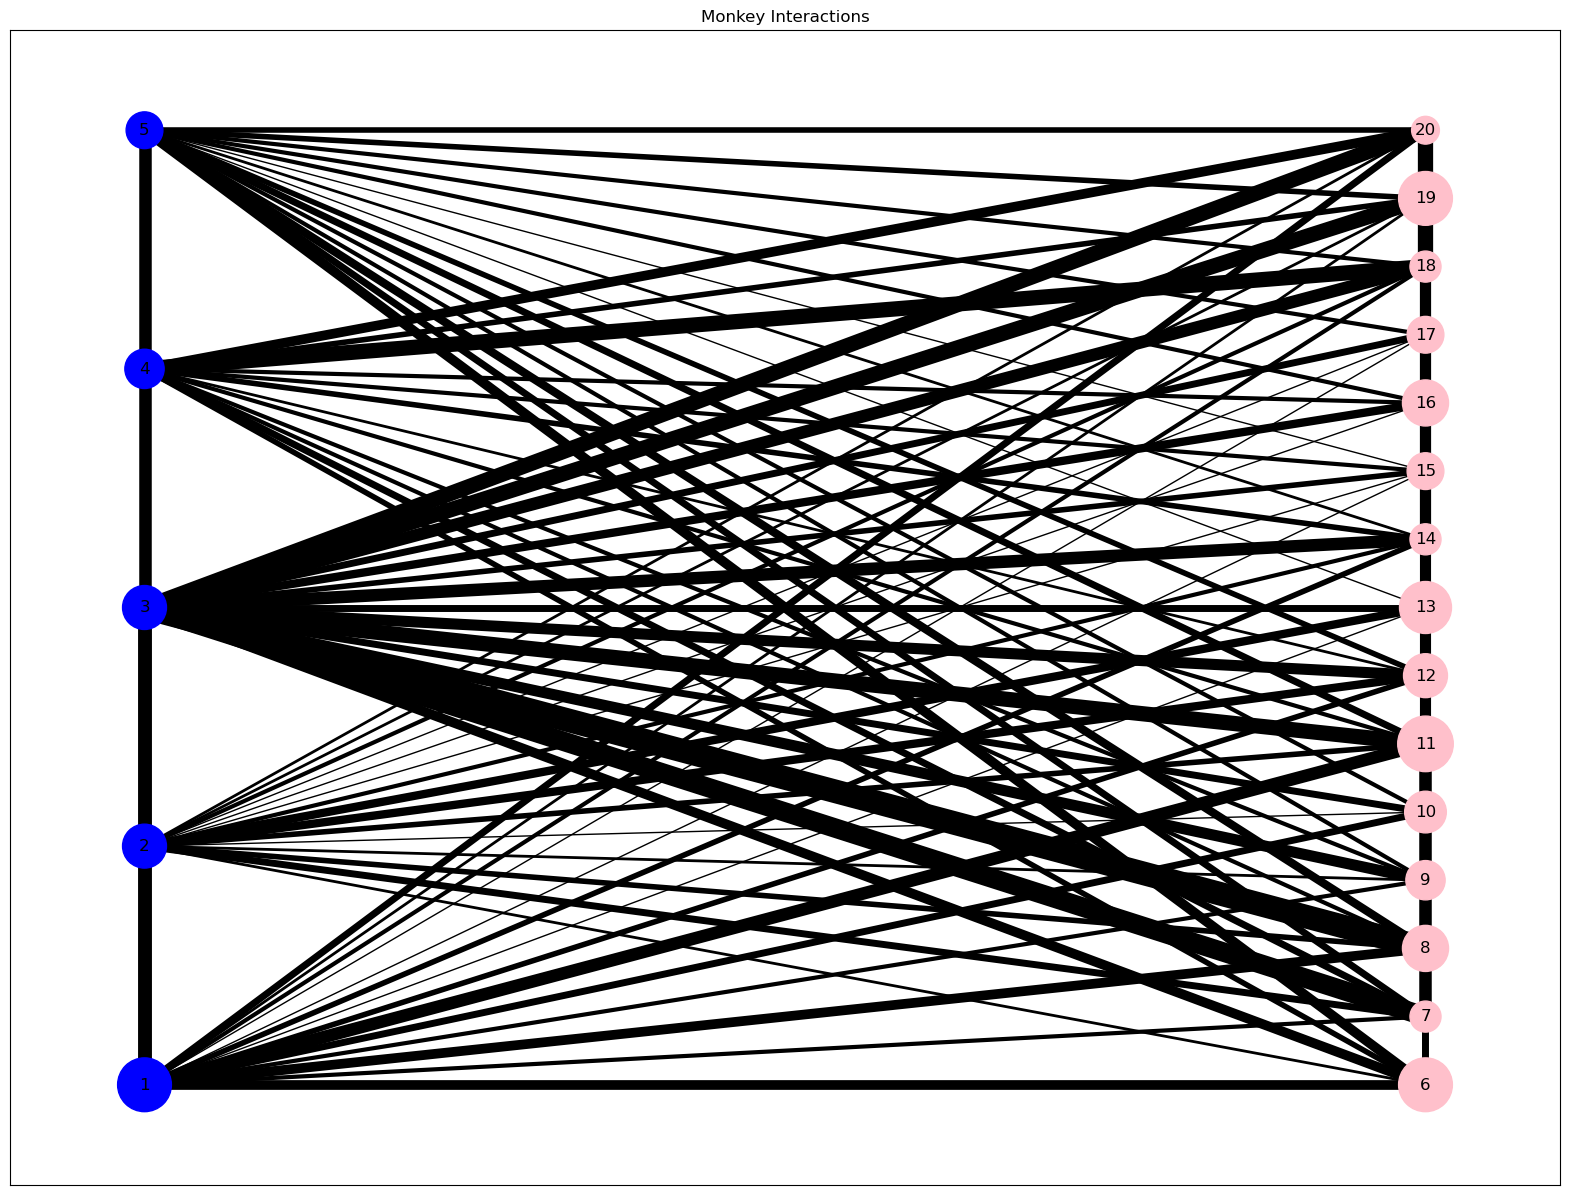

In [91]:
G = nx.Graph()

# Female and male nodes
male_nodes = labels[labels['Sex'] == 'male']['Id'].tolist()
female_nodes = labels[labels['Sex'] == 'female']['Id'].tolist()

G.add_nodes_from(male_nodes, bipartite=0) 
G.add_nodes_from(female_nodes, bipartite=1)

for index, row in edgelist_df.iterrows():
    G.add_edge(row['source'], row['target'], weight=row['weight'])

pos = nx.bipartite_layout(G, nodes=male_nodes, align='vertical')

# Color by gender
node_color = ['blue' if G.nodes[node]['bipartite'] == 0 else 'pink' for node in G.nodes]

node_size = [labels[labels['Id'] == node]['Age'].values[0] * 100 for node in G.nodes]

edge_width = [data['weight'] for u, v, data in G.edges(data=True)]

plt.figure(figsize=(20,15))
nx.draw_networkx(G, pos, node_color=node_color, node_size=node_size, width=edge_width, with_labels=True)
plt.title('Monkey Interactions')
plt.show()

#### Part 1.4 Make an interactive network (20 points)

Now make an interactive network use the same data. No need to maintain the bipartite layout but still colors, sizes and width to customize gender, age and weights. Save the html file and submit it with the Jupyter notebook. 

In [96]:
from pyvis.network import Network
import matplotlib.colors as mcolors

monkey_net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")
monkey_net.barnes_hut()

labels['Id'] = labels['Id'].astype(str)
edgelist_df['source'] = edgelist_df['source'].astype(str)
edgelist_df['target'] = edgelist_df['target'].astype(str)

cmap = plt.cm.get_cmap('Purples')
norm = mcolors.Normalize(vmin=edgelist_df['weight'].min(), vmax=edgelist_df['weight'].max())

# Nodes
for index, row in labels.iterrows():
    monkey_net.add_node(row['Id'], label=row['Id'], title=row['Id'], 
                 color=node_color[index], size=row['Age'])

# Edges
for index, row in edgelist_df.iterrows():
    monkey_net.add_edge(row['source'], row['target'], width=row['weight'],
                 color=mcolors.rgb2hex(cmap(norm(row['weight']))))

neighbor_map = monkey_net.get_adj_list()
for node in monkey_net.nodes:
                node["title"] += " Neighbors: " + " ".join(str(node["id"]))

monkey_net.write_html('monkeys.html')

C:\Users\kenne\AppData\Local\Temp\ipykernel_18288\334184184.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Purples')


### Part 2 Design your own social network (30 points)

Now, let's try to visualize your own social network. 

- Open an excel file.
- Set up an adjacency matrix for at least 10 people you know (not including yourself)
- Label the adjacency matrix based on your knowledge whether they know each other or not (You can just use 0/1 to indicate whether they know each other or not)
- Load the adjacency matrix to the Jupyter Notebook
- Convert then data to edgelist
- Plot the static network for your social network
- Now, include yourself into the network, plot the network again
- Discuss what you have seen in two networks and is there a specific layout you have chosen for your network. 

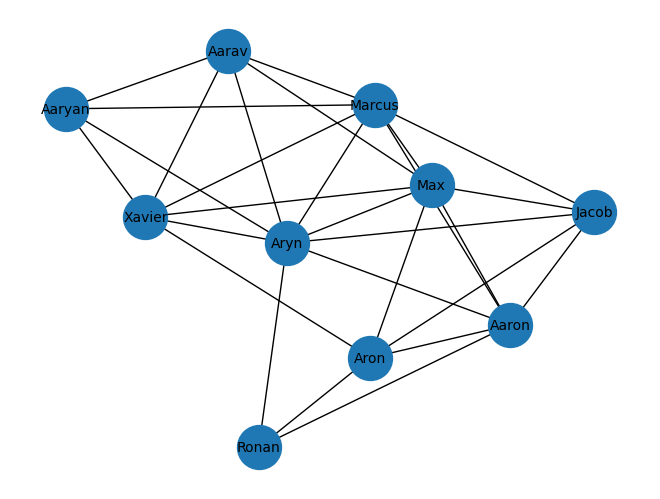

In [111]:
# Without myself
friends_df = pd.read_csv('friends.csv', index_col=0)
friends_df = friends_df.rename(columns={'Unnamed: 0': 'name'})

friends_num = len(friends_df)
name_list = list(friends_df.index)

edge_list = []
weight_list = []

for i in range(friends_num):
    for j in range(i+1, friends_num):
        weight = friends_df.iloc[i, j]
        if weight !=0:
            edge_list.append((name_list[i], name_list[j]))
            weight_list.append(weight)

edgelist_df = pd.DataFrame({'source': [edge[0] for edge in edge_list],
                            'target': [edge[1] for edge in edge_list],
                            'weight': weight_list})

G = nx.Graph()

for name in name_list:
    G.add_node(name)
    
for index,row in edgelist_df.iterrows():
    G.add_edge(row['source'], row['target'])
    
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000,
        font_size=10)

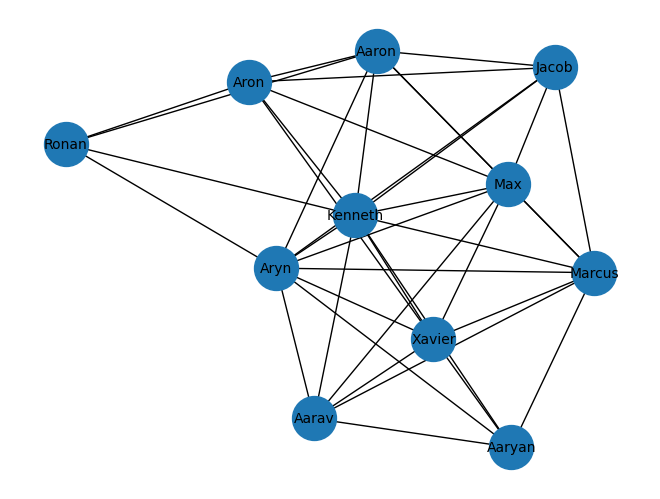

In [110]:
# Including myself
friends_df = pd.read_csv('friends_myself.csv', index_col=0)
friends_df = friends_df.rename(columns={'Unnamed: 0': 'name'})

friends_num = len(friends_df)
name_list = list(friends_df.index)

edge_list = []
weight_list = []

for i in range(friends_num):
    for j in range(i+1, friends_num):
        weight = friends_df.iloc[i, j]
        if weight !=0:
            edge_list.append((name_list[i], name_list[j]))
            weight_list.append(weight)

edgelist_df = pd.DataFrame({'source': [edge[0] for edge in edge_list],
                            'target': [edge[1] for edge in edge_list],
                            'weight': weight_list})

G = nx.Graph()

for name in name_list:
    G.add_node(name)
    
for index,row in edgelist_df.iterrows():
    G.add_edge(row['source'], row['target'])
    
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000,
        font_size=10)

When I add myself into the graph I am added in the middle with every connection, which makes sense because I know every other person on the graph. The network definetly becomes more full when I add myself to the matrix. Both networks also show a triangle between Ronan, Aron, and Aaron, which makes sense because they are my friends from back home while everyone else is a college friend. Both networks also seem to have a group of Aarav, Aaryan, Xavier, and Marcus, which is also reflective of the relationships in real life. I choose to use the kamada kawai graph because this graph finds the best layout depending on the connections.

### Part 3 In-class activities in lecture 17

Write a paragraph about the importance of data visualization in data analysis (about 100 words). Then identify the logic flow in your writing. 

Data visualization is crucial in data analysis because it makes complex information easier to understand. Especially in today's world, it is easy to end up with an overload of data, data visualizations are able to simplify data in a digestible format. Visualizations are also important for pattern recognition. For humans, charts and graphs make it much easier to understand patterns and relationships than pure numbers. Visualizations are able to demonstrate findings in an easy way, especially when trying to find outliers or anomalies. Furthermore, visualizations are helpful in bridging the gap between the experts on data analysis and decision-makers, who oftentimes are not as competent in data analysis. 

For the logic flow, in the first sentence I provided an example of how data visualization is important and then expanded on it in the next sentence. I followed the same pattern with the next point, introducing pattern recognition and expanding on it with the next two sentences, pointing out the ease of finding outliers with visualizations. Then, I used my last sentence as a conclusion, in which I tied data visualization to the real world and briefly talked about its impact on how decisions are made.